# What can we do with a single Monarch?

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from einops import rearrange

In [2]:
N = 16
sqrt_N = 4

In [85]:
def get_P_matrix(N, sqrt_N):
    idx = torch.arange(N)
    idx = rearrange(idx, '(m n) -> (n m)', m = sqrt_N)

    P = torch.diag(torch.ones(N))[idx]

    return P

def random_toeplitz(N):
    x = torch.randn(N)
    out = torch.zeros(N, N)
    for i in range(N):
        out += torch.diag(torch.full((N - i,), x[i]), diagonal=-i)
    return out

# One Monarch to get almost lower triangular matrix

In [97]:
block_R = torch.zeros(N, N) # lower triangular
block_L = torch.zeros(N, N) # lower triangular

for i in range(sqrt_N):
    block_R[i * sqrt_N : (i + 1) * sqrt_N, i * sqrt_N : (i + 1) * sqrt_N] = torch.tril(torch.randn(sqrt_N, sqrt_N))

    block_L[i * sqrt_N : (i + 1) * sqrt_N, i * sqrt_N : (i + 1) * sqrt_N] = torch.tril(torch.randn(sqrt_N, sqrt_N))

P = get_P_matrix(N, sqrt_N)

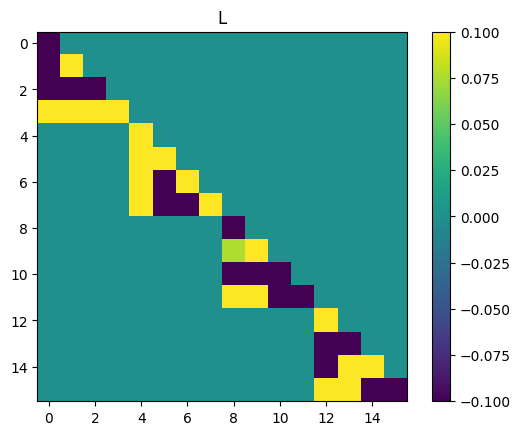

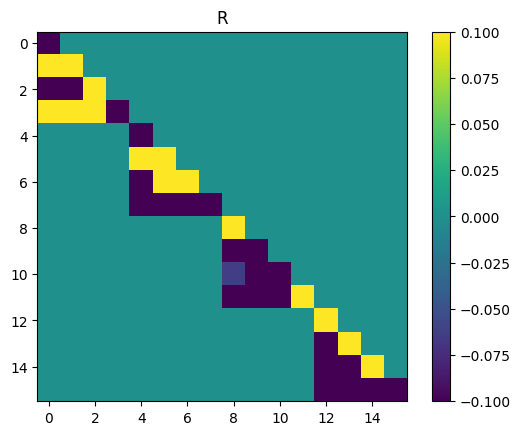

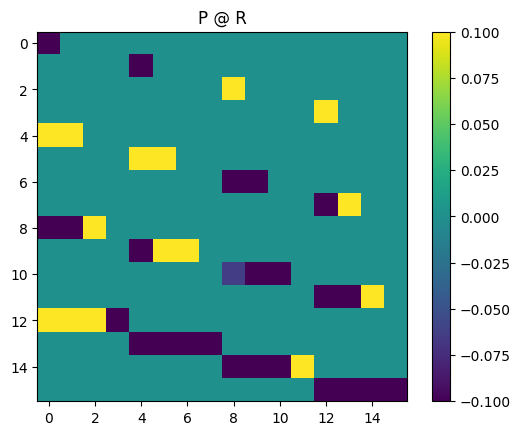

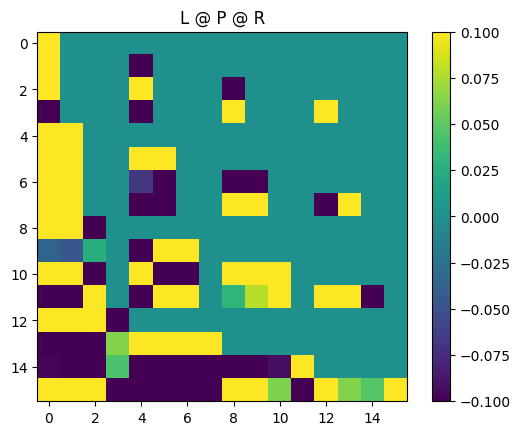

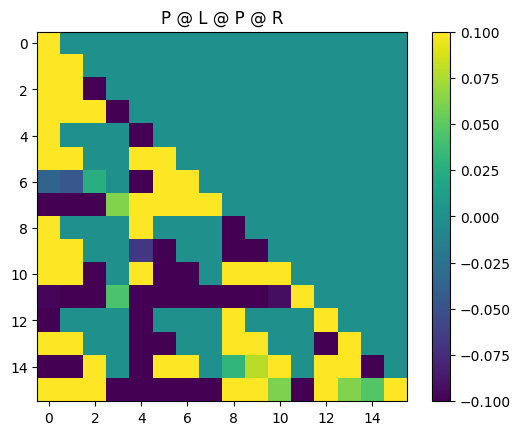

In [99]:
plt.imshow(block_L, vmin=-0.1, vmax=0.1)
plt.title('L')
plt.colorbar()
plt.show()

plt.imshow(block_R, vmin=-0.1, vmax=0.1)
plt.title('R')
plt.colorbar()
plt.show()

plt.imshow(P @ block_R, vmin=-0.1, vmax=0.1)
plt.title('P @ R')
plt.colorbar()
plt.show()

plt.imshow(block_L @ P @ block_R, vmin=-0.1, vmax=0.1)
plt.title('L @ P @ R')
plt.colorbar()
plt.show()

plt.imshow(P @ block_L @ P @ block_R, vmin=-0.1, vmax=0.1)
plt.title('P @ L @ P @ R')
plt.colorbar()
plt.show()

# Use two Monarchs to get lower triangular matrix

In [103]:
block_R = torch.zeros(N, N) # full
block_L = torch.zeros(N, N) # lower triangular, diagonal - 1

block_B = torch.zeros(N, N) # lower triangular

for i in range(sqrt_N):
    block_R[i * sqrt_N : (i + 1) * sqrt_N, i * sqrt_N : (i + 1) * sqrt_N] = torch.randn(sqrt_N, sqrt_N)
    block_B[i * sqrt_N : (i + 1) * sqrt_N, i * sqrt_N : (i + 1) * sqrt_N] = torch.tril(torch.randn(sqrt_N, sqrt_N))

    block_L[i * sqrt_N : (i + 1) * sqrt_N, i * sqrt_N : (i + 1) * sqrt_N] = torch.tril(torch.randn(sqrt_N, sqrt_N), diagonal=-1)

P = get_P_matrix(N, sqrt_N)

In [106]:
# plt.imshow(P @ block_L @ P @ block_R)
plt.imshow(block_L, vmin=-0.1, vmax=0.1)
plt.title('L')
plt.colorbar()
plt.show()

plt.imshow(block_R, vmin=-0.1, vmax=0.1)
plt.title('R')
plt.colorbar()
plt.show()

plt.imshow(block_B, vmin=-0.1, vmax=0.1)
plt.title('B')
plt.colorbar()
plt.show()

plt.imshow(P @ block_L @ P @ block_R, vmin=-0.1, vmax=0.1)
plt.title('P @ L @ P @ R')
plt.colorbar()
plt.show()

plt.imshow(P @ block_L @ P @ block_R + block_B, vmin=-0.1, vmax=0.1)
plt.title('P @ L @ P @ R + B')
plt.colorbar()
plt.show()

SyntaxError: invalid syntax (3343521307.py, line 17)